In [50]:
import numpy
import os
import json
import torch
import xlrd
import pandas as pd
from pandas.core.frame import DataFrame

filelist = os.listdir()

path = './result/different_set_size/2/s047'
filetype ='.json'

def get_filename(path,filetype):
    name =[]
    final_name = []
    for root,dirs,files in os.walk(path):
        for i in files:
            if filetype in i:
                name.append(i.replace(filetype,''))
    final_name = [path +'/'+ item +'.json' for item in name]
    return final_name

param_filename_list = []
mu_distance_list = []
W_distance_list = []

for file_name in get_filename(path, filetype):
    param_filename_list.append (file_name) 

for param_filename1 in param_filename_list:
    if not os.path.exists(param_filename1):
        raise FileNotFoundError(
            'Input file `{:s}` not found.'.format(param_filename1))
    with open(param_filename1, 'r') as param_file1:
        param_dict1 = json.load(param_file1)
        
    mu_distance_list_temp = []
    W_distance_list_temp = []
    for param_filename2 in param_filename_list:        
        if not os.path.exists(param_filename2):
            raise FileNotFoundError(
                'Input file `{:s}` not found.'.format(param_filename2))
        with open(param_filename2, 'r') as param_file2:
            param_dict2 = json.load(param_file2)


        mu1 = numpy.array(param_dict1['vi_exp']['mu'])
        W1 = numpy.array(param_dict1['vi_exp']['adjacency'])

        mu2 = numpy.array(param_dict2['vi_exp']['mu'])
        W2 = numpy.array(param_dict2['vi_exp']['adjacency'])

        dist_mu = numpy.sqrt(numpy.sum(numpy.square(mu1 - mu2)))
        dist_W =  numpy.sqrt(numpy.sum(numpy.square(W1 - W2)))
        
        mu_distance_list_temp.append(dist_mu)
        W_distance_list_temp.append(dist_W)
    mu_distance_list.append(mu_distance_list_temp)
    W_distance_list.append(W_distance_list_temp)

data_frame_mu = DataFrame(mu_distance_list)
data_frame_W = DataFrame(W_distance_list)

In [51]:
data_frame_mu


,0,1,2,3
0,0.000000,0.069062,0.114081,0.159292
1,0.069062,0.000000,0.045019,0.090230
2,0.114081,0.045019,0.000000,0.045211
3,0.159292,0.090230,0.045211,0.000000


In [52]:
data_frame_W

,0,1,2,3
0,0.000000,51.713178,48.348877,46.713054
1,51.713178,0.000000,4.294142,7.860852
2,48.348877,4.294142,0.000000,3.724599
3,46.713054,7.860852,3.724599,0.000000


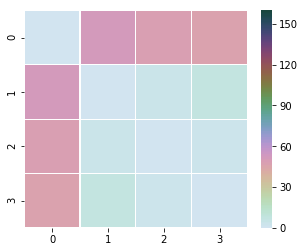

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
cmap = sns.cubehelix_palette(start = 1, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(data_frame_W, linewidths = 0.05, vmax=160, vmin=0, cmap=cmap, center=None, robust=False, annot=False)
plt.show()